In [1]:
! pip install transformers sentencepiece datasets

     |████████████████████████████████| 3.4 MB 28.4 MB/s 
     |████████████████████████████████| 1.2 MB 59.7 MB/s 
     |████████████████████████████████| 306 kB 59.9 MB/s 
     |████████████████████████████████| 67 kB 1.2 MB/s 
     |████████████████████████████████| 895 kB 66.7 MB/s 
     |████████████████████████████████| 596 kB 75.6 MB/s 
     |████████████████████████████████| 3.3 MB 59.8 MB/s 
     |████████████████████████████████| 133 kB 74.3 MB/s 
     |████████████████████████████████| 243 kB 81.7 MB/s 
     |████████████████████████████████| 1.1 MB 63.0 MB/s 
     |████████████████████████████████| 271 kB 79.7 MB/s 
     |████████████████████████████████| 160 kB 76.3 MB/s 
     |████████████████████████████████| 192 kB 82.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from translator import Translator
from datasets import load_dataset
from google.colab import drive
from transformers import AutoTokenizer

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [14]:
model_repo = 'google/mt5-small'
tokenizer = AutoTokenizer.from_pretrained(model_repo)
translator = Translator(size = 'small', cuda = True)

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

# Train the model

## Load the dataset

In [ ]:
# test_dataset = load_dataset("europa_ecdc_tm", language_pair=("en", "de"))
# test_train_dataset = dataset['train']

Using custom data configuration en2de-63ae1feb71de0d84
Reusing dataset europa_ecdc_tm (/root/.cache/huggingface/datasets/europa_ecdc_tm/en2de-63ae1feb71de0d84/0.0.0/67a1105f6b3ff701a9dd2f0462c2b368a8c82b524786b97005b6e63edabb7961)


  0%|          | 0/1 [00:00<?, ?it/s]

## Fit the model

In [ ]:
# mt5_model, losses = translator.fit(data = train_dataset, batch_size = 64, nr_epochs = 1, save_path=model_path, losses_path = losses_path)

# Show the results of the model

In [25]:
model_path_1h = '/content/gdrive/My Drive/mt5-model-bigdata-1h.sav'
losses_path_1h = '/content/gdrive/My Drive/mt5-losses-bigdata-1h'

model_path_3h = '/content/gdrive/My Drive/mt5-model-bigdata-3h.sav'
losses_path_3h = '/content/gdrive/My Drive/mt5-losses-bigdata-3h'

## The results from the model after hour-hour and a half of training

In [9]:
import pickle
loaded_mt5_1h = pickle.load(open(model_path_1h, 'rb'))
loaded_losses_1h = pickle.load(open(losses_path_1h, 'rb'))

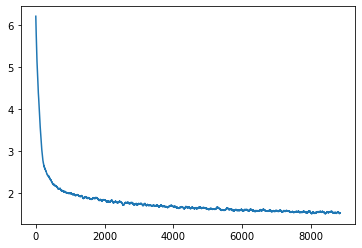

In [13]:
import numpy as np
import matplotlib.pyplot as plt

window_size = 50
smoothed_losses_1h = []
for i in range(len(loaded_losses_1h)-window_size):
  smoothed_losses_1h.append(np.mean(loaded_losses_1h[i:i+window_size]))

plt.plot(smoothed_losses_1h[100:])

In [16]:
test_sentence = 'A horse walks under a bridge next to a boat.'
print('Raw input text:', test_sentence)

input_ids = translator.encode_input_str(
    text = test_sentence,
    traget_lang = 'de',
    seq_len = 20)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = loaded_mt5_1h.generate(input_ids, num_beams = 10)
print(tokenizer.decode(output_tokens[0], skip_special_tokens=True)) 

Raw input text: A horse walks under a bridge next to a boat.
Ein Pferd fährt unter einer Brücke hinter einem Boot.


In [29]:
test_sentence = 'Ein pferd geht unter einer brücke neben einem boot.'
print('Raw input text:', test_sentence)

input_ids = translator.encode_input_str(
    text = test_sentence,
    traget_lang = 'en',
    seq_len = 20)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = loaded_mt5_1h.generate(input_ids, num_beams = 10)
print(tokenizer.decode(output_tokens[0], skip_special_tokens=True)) 

Raw input text: Ein pferd geht unter einer brücke neben einem boot.
A horse is riding on a bridge alongside a boat.


The result "Ein Pferd fährt unter einer Brücke hinter einem Boot." = "A horse drives under a bridge behind a boat." according to Google Translate

## The result of the model after training it for around 3 hours

In [26]:
loaded_mt5_3h = pickle.load(open(model_path_3h, 'rb'))
loaded_losses_3h = pickle.load(open(losses_path_3h, 'rb'))

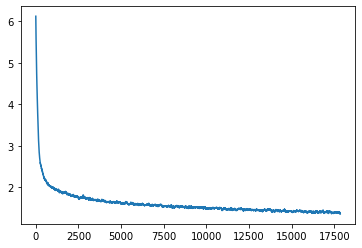

In [27]:
import numpy as np
import matplotlib.pyplot as plt

window_size = 50
smoothed_losses_3h = []
for i in range(len(loaded_losses_3h)-window_size):
  smoothed_losses_3h.append(np.mean(loaded_losses_3h[i:i+window_size]))

plt.plot(smoothed_losses_3h[100:])

In [28]:
test_sentence = 'A horse walks under a bridge next to a boat.'
print('Raw input text:', test_sentence)

input_ids = translator.encode_input_str(
    text = test_sentence,
    traget_lang = 'de',
    seq_len = 20)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = loaded_mt5_3h.generate(input_ids, num_beams = 10)
print(tokenizer.decode(output_tokens[0], skip_special_tokens=True))

Raw input text: A horse walks under a bridge next to a boat.
Ein Pferd fährt unter einer Brücke neben einem Boot.


The result "Ein Pferd fährt unter einer Brücke neben einem Boot." = "A horse rides under a bridge next to a boat" according to Google Translate, which is pretty close.

In [30]:
test_sentence = 'Ein pferd geht unter einer brücke neben einem boot.'
print('Raw input text:', test_sentence)

input_ids = translator.encode_input_str(
    text = test_sentence,
    traget_lang = 'en',
    seq_len = 20)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = loaded_mt5_3h.generate(input_ids, num_beams = 10)
print(tokenizer.decode(output_tokens[0], skip_special_tokens=True)) 

Raw input text: Ein pferd geht unter einer brücke neben einem boot.
A horse goes under a bridge behind a boat.


In [43]:
test_sentence = 'Ein Boot mit mehreren Männern.'
print('Raw input text:', test_sentence)

input_ids = translator.encode_input_str(
    text = test_sentence,
    traget_lang = 'en',
    seq_len =20)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = loaded_mt5_3h.generate(input_ids, num_beams = 10)
print(tokenizer.decode(output_tokens[0], skip_special_tokens=True)) 

Raw input text: Ein Boot mit mehreren Männern.
A boat with several men.
